__TASKS__

1. READ IN TARGETS DATA  

2. SORT TARGETS DATA
    
3. ADD FEATURES TO DATA FOR POSSIBLE FUTURE USE
    
4. SAVE
    

In [1]:
# import libraries that will be used throughout the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.DEBUG)

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
logging.debug("READING IN 2016 TARGET SET...")
target_2016_df = pd.read_csv("Input/train_2016_v2.csv")

logging.debug("READING IN 2017 TARGET SET...")
target_2017_df = pd.read_csv("Input/train_2017.csv")

DEBUG:root:READING IN 2016 TARGET SET...
DEBUG:root:READING IN 2017 TARGET SET...


In [3]:
# before we plot the values we need to sort the data by date. first we will create a list of unique dates (to sort)
# and a dictionary of corresponding values
unique_dates = []
accumulated_values = {}

for id, row in target_2016_df.iterrows():
    e = row['logerror']
    d = row['transactiondate']
    p = row['parcelid']
    
    try:
        accumulated_values[d].append((p, e))
    except KeyError:
        unique_dates.append(d)
        accumulated_values[d] = [(p, e)]
        
unique_dates.sort()

logging.debug("{}\n...\n{}".format(unique_dates[:50], unique_dates[-50:]))

DEBUG:root:['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16', '2016-01-17', '2016-01-18', '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-23', '2016-01-24', '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28', '2016-01-29', '2016-01-30', '2016-01-31', '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-06', '2016-02-07', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13', '2016-02-14', '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18', '2016-02-19']
...
['2016-11-06', '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-12', '2016-11-13', '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18', '2016-11-19', '2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-27', '2016-11-28', '20

In [4]:
# before we plot the values we need to sort the data by date. first we will create a list of unique dates (to sort)
# and a dictionary of corresponding values
unique_dates = []
accumulated_values = {}

for id, row in target_2017_df.iterrows():
    e = row['logerror']
    d = row['transactiondate']
    p = row['parcelid']
    
    try:
        accumulated_values[d].append((p, e))
    except KeyError:
        unique_dates.append(d)
        accumulated_values[d] = [(p, e)]
        
unique_dates.sort()

logging.debug("{}\n...\n{}".format(unique_dates[:50], unique_dates[-50:]))

DEBUG:root:['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-18', '2017-02-19']
...
['2017-08-03', '2017-08-04', '2017-08-05', '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '20

_After some time away from analysis, I had a surprising thought. No EDA that I had looked into even explored the effect that the day of the week may have had on a given sale. I will add that weekday feature to the data and see if it yields any trends._

In [5]:
import datetime

weekday = []
year = []
month = []
day = []

for id, row in target_2016_df.iterrows():
    y, m, d = row['transactiondate'].split('-')
    
    weekday.append(datetime.date(int(y), int(m), int(d)).weekday())
    year.append(int(y))
    month.append(int(m))
    day.append(int(d))
    
target_2016_df['weekday'] = np.array(weekday)
target_2016_df['year'] = np.array(year)
target_2016_df['month'] = np.array(month)
target_2016_df['day'] = np.array(day)

logging.debug(target_2016_df)

DEBUG:root:       parcelid  logerror transactiondate  weekday  year  month  day
0      11016594    0.0276      2016-01-01        4  2016      1    1
1      14366692   -0.1684      2016-01-01        4  2016      1    1
2      12098116   -0.0040      2016-01-01        4  2016      1    1
3      12643413    0.0218      2016-01-02        5  2016      1    2
4      14432541   -0.0050      2016-01-02        5  2016      1    2
5      11509835   -0.2705      2016-01-02        5  2016      1    2
6      12286022    0.0440      2016-01-02        5  2016      1    2
7      17177301    0.1638      2016-01-02        5  2016      1    2
8      14739064   -0.0030      2016-01-02        5  2016      1    2
9      14677559    0.0843      2016-01-03        6  2016      1    3
10     10854446    0.3825      2016-01-03        6  2016      1    3
11     11672170   -0.0161      2016-01-03        6  2016      1    3
12     10949761    0.0344      2016-01-03        6  2016      1    3
13     14665244    0.08

In [6]:
import datetime

weekday = []
year = []
month = []
day = []

for id, row in target_2017_df.iterrows():
    y, m, d = row['transactiondate'].split('-')
    
    weekday.append(datetime.date(int(y), int(m), int(d)).weekday())
    year.append(int(y))
    month.append(int(m))
    day.append(int(d))
    
target_2017_df['weekday'] = np.array(weekday)
target_2017_df['year'] = np.array(year)
target_2017_df['month'] = np.array(month)
target_2017_df['day'] = np.array(day)

logging.debug(target_2017_df)

DEBUG:root:       parcelid  logerror transactiondate  weekday  year  month  day
0      14297519  0.025595      2017-01-01        6  2017      1    1
1      17052889  0.055619      2017-01-01        6  2017      1    1
2      14186244  0.005383      2017-01-01        6  2017      1    1
3      12177905 -0.103410      2017-01-01        6  2017      1    1
4      10887214  0.006940      2017-01-01        6  2017      1    1
5      17143294 -0.020526      2017-01-01        6  2017      1    1
6      12095076 -0.001011      2017-01-01        6  2017      1    1
7      12069064  0.101723      2017-01-01        6  2017      1    1
8      12790562 -0.040966      2017-01-02        0  2017      1    2
9      11542646 -0.036763      2017-01-02        0  2017      1    2
10     11104527  0.005963      2017-01-02        0  2017      1    2
11     13984101 -0.147997      2017-01-02        0  2017      1    2
12     14705431 -0.028835      2017-01-02        0  2017      1    2
13     13944538  0.0456

_We could also use holiday and weather information, potentially, if we try to train a model to predict at a daily resolution._

In [7]:
from pandas.tseries.holiday import USFederalHolidayCalendar

holid = []

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=target_2016_df['transactiondate'].values[0], end=target_2016_df['transactiondate'].values[-1]).to_pydatetime()

for id, row in target_2016_df.iterrows():
    y, m, d = row['transactiondate'].split('-')

    dt = datetime.datetime(int(y), int(m), int(d), 0, 0)
    
    if dt in holidays:
        holid.append(1)
    else:
        holid.append(0)

target_2016_df['holiday'] = np.array(holid)
logging.debug(target_2016_df)

DEBUG:root:       parcelid  logerror transactiondate  weekday  year  month  day  holiday
0      11016594    0.0276      2016-01-01        4  2016      1    1        1
1      14366692   -0.1684      2016-01-01        4  2016      1    1        1
2      12098116   -0.0040      2016-01-01        4  2016      1    1        1
3      12643413    0.0218      2016-01-02        5  2016      1    2        0
4      14432541   -0.0050      2016-01-02        5  2016      1    2        0
5      11509835   -0.2705      2016-01-02        5  2016      1    2        0
6      12286022    0.0440      2016-01-02        5  2016      1    2        0
7      17177301    0.1638      2016-01-02        5  2016      1    2        0
8      14739064   -0.0030      2016-01-02        5  2016      1    2        0
9      14677559    0.0843      2016-01-03        6  2016      1    3        0
10     10854446    0.3825      2016-01-03        6  2016      1    3        0
11     11672170   -0.0161      2016-01-03        6  2

In [8]:
holid = []

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=target_2017_df['transactiondate'].values[0], end=target_2017_df['transactiondate'].values[-1]).to_pydatetime()

for id, row in target_2017_df.iterrows():
    y, m, d = row['transactiondate'].split('-')

    dt = datetime.datetime(int(y), int(m), int(d), 0, 0)
    
    if dt in holidays:
        holid.append(1)
    else:
        holid.append(0)

target_2017_df['holiday'] = np.array(holid)
logging.debug(target_2017_df)

DEBUG:root:       parcelid  logerror transactiondate  weekday  year  month  day  holiday
0      14297519  0.025595      2017-01-01        6  2017      1    1        0
1      17052889  0.055619      2017-01-01        6  2017      1    1        0
2      14186244  0.005383      2017-01-01        6  2017      1    1        0
3      12177905 -0.103410      2017-01-01        6  2017      1    1        0
4      10887214  0.006940      2017-01-01        6  2017      1    1        0
5      17143294 -0.020526      2017-01-01        6  2017      1    1        0
6      12095076 -0.001011      2017-01-01        6  2017      1    1        0
7      12069064  0.101723      2017-01-01        6  2017      1    1        0
8      12790562 -0.040966      2017-01-02        0  2017      1    2        1
9      11542646 -0.036763      2017-01-02        0  2017      1    2        1
10     11104527  0.005963      2017-01-02        0  2017      1    2        1
11     13984101 -0.147997      2017-01-02        0  2

_Finally, as stated earlier, let's add some weather information too._

In [9]:
logging.debug("READING IN WEATHER DATA...")
weather = pd.read_csv("Input/weather.csv")

delete = ["STATION","NAME","LATITUDE","LONGITUDE","ELEVATION","AWND_ATTRIBUTES","PGTM","PGTM_ATTRIBUTES",
          "PRCP_ATTRIBUTES","SNOW_ATTRIBUTES","SNWD_ATTRIBUTES","TAVG_ATTRIBUTES","TMAX_ATTRIBUTES","TMIN_ATTRIBUTES",
          "WDF2","WDF2_ATTRIBUTES","WDF5","WDF5_ATTRIBUTES","WSF2","WSF2_ATTRIBUTES","WSF5","WSF5_ATTRIBUTES",
          "WT01_ATTRIBUTES","WT02_ATTRIBUTES","WT03_ATTRIBUTES","WT08_ATTRIBUTES"]

weather.drop(delete, axis=1, inplace=True)

target_2016_df = pd.merge(target_2016_df, weather, left_on=['transactiondate'], right_on=['DATE'])
target_2017_df = pd.merge(target_2017_df, weather, left_on=['transactiondate'], right_on=['DATE'])

logging.debug(target_2017_df.head(3).transpose())

DEBUG:root:READING IN WEATHER DATA...
DEBUG:root:                          0           1           2
parcelid           14297519    17052889    14186244
logerror          0.0255949   0.0556191  0.00538285
transactiondate  2017-01-01  2017-01-01  2017-01-01
weekday                   6           6           6
year                   2017        2017        2017
month                     1           1           1
day                       1           1           1
holiday                   0           0           0
DATE             2017-01-01  2017-01-01  2017-01-01
AWND                   3.13        3.13        3.13
PRCP                      0           0           0
SNOW                      0           0           0
SNWD                      0           0           0
TAVG                     50          50          50
TMAX                     58          58          58
TMIN                     42          42          42
WT01                      1           1           1
WT02           

In [10]:
del target_2016_df['DATE']
del target_2017_df['DATE']

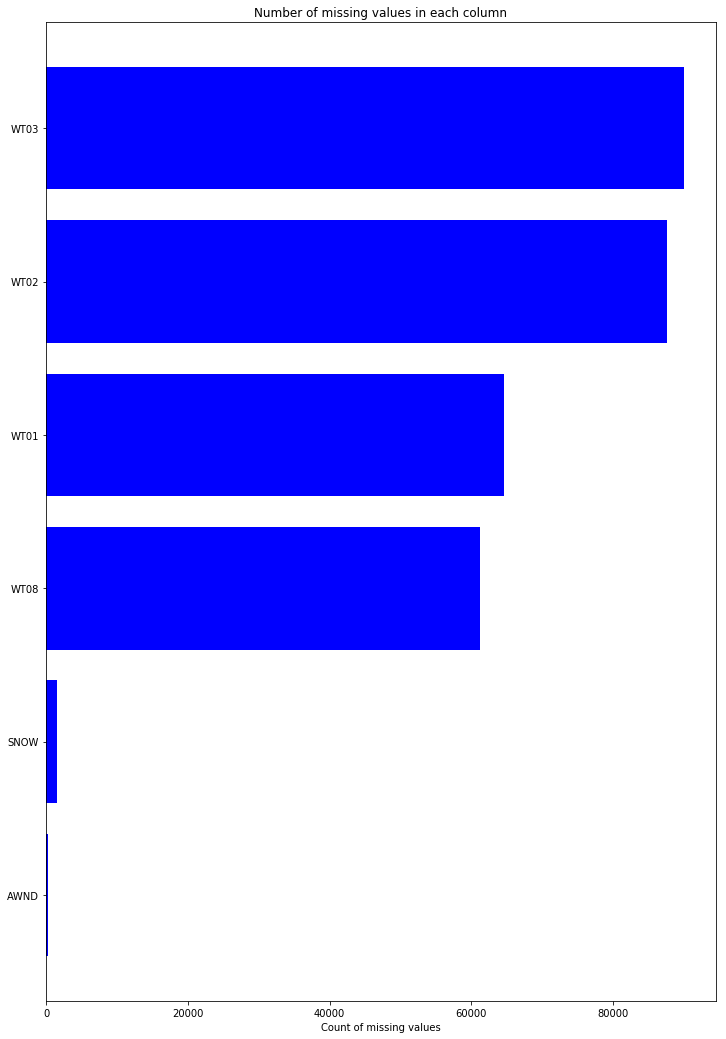

In [13]:
missing_df = target_2016_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

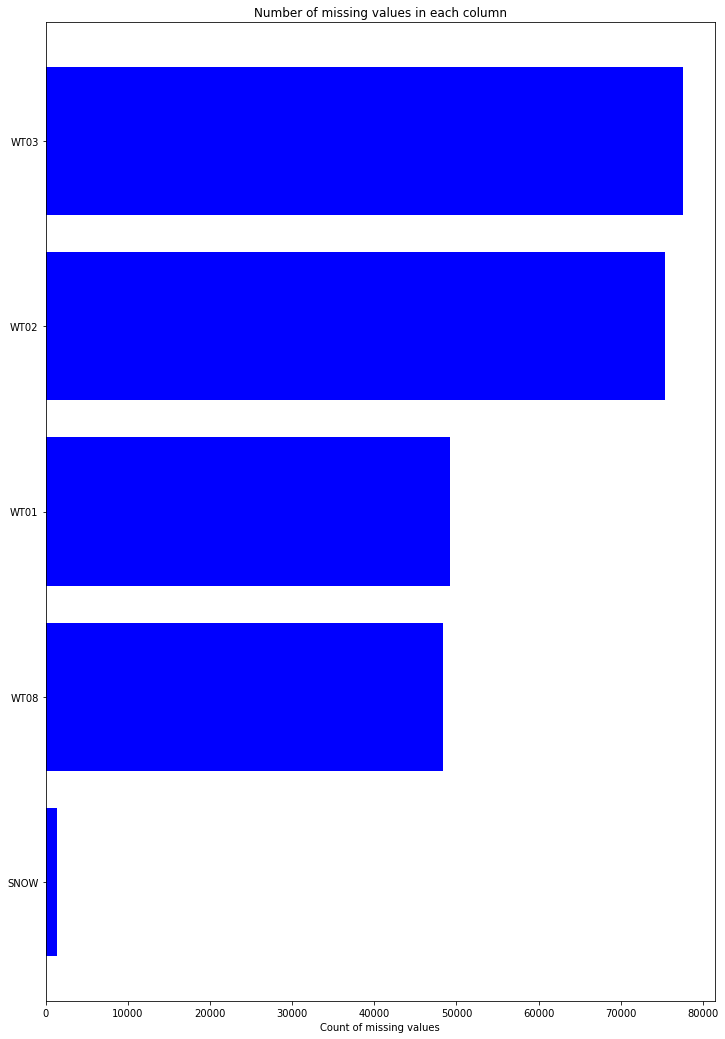

In [14]:
missing_df = target_2017_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

_We're missing just a few weather values... Probably from days that did not have those attributes. Let's fill them in with 0's._

In [15]:
target_2016_df['WT03'] = target_2016_df['WT03'].fillna(0)
target_2017_df['WT03'] = target_2017_df['WT03'].fillna(0)

target_2016_df['WT02'] = target_2016_df['WT02'].fillna(0)
target_2017_df['WT02'] = target_2017_df['WT02'].fillna(0)

target_2016_df['WT01'] = target_2016_df['WT01'].fillna(0)
target_2017_df['WT01'] = target_2017_df['WT01'].fillna(0)

target_2016_df['WT08'] = target_2016_df['WT08'].fillna(0)
target_2017_df['WT08'] = target_2017_df['WT08'].fillna(0)

target_2016_df['SNOW'] = target_2016_df['SNOW'].fillna(0)
target_2017_df['SNOW'] = target_2017_df['SNOW'].fillna(0)

target_2016_df['AWND'] = target_2016_df['AWND'].fillna(0)
target_2017_df['AWND'] = target_2017_df['AWND'].fillna(0)

In [16]:
logging.debug(target_2016_df.head(3).transpose())
logging.debug(target_2017_df.head(3).transpose())

DEBUG:root:                          0           1           2
parcelid           11016594    14366692    12098116
logerror             0.0276     -0.1684      -0.004
transactiondate  2016-01-01  2016-01-01  2016-01-01
weekday                   4           4           4
year                   2016        2016        2016
month                     1           1           1
day                       1           1           1
holiday                   1           1           1
AWND                   4.03        4.03        4.03
PRCP                      0           0           0
SNOW                      0           0           0
SNWD                      0           0           0
TAVG                     54          54          54
TMAX                     67          67          67
TMIN                     42          42          42
WT01                      0           0           0
WT02                      0           0           0
WT03                      0           0           0
W

_Now let's write these datasets out._

In [17]:
target_2016_df.to_csv("Input/train_2016_mod.csv", sep=',', encoding='utf-8', index=False)
target_2017_df.to_csv("Input/train_2017_mod.csv", sep=',', encoding='utf-8', index=False)

In [ ]:
# now we can go through the dates in order and plot the logerrors
logerror = []
parcelid = []
transactiondate = []

for date in unique_dates:
    for data in accumulated_values[date]:
        transactiondate.append(date)
        parcelid.append(data[0])
        logerror.append(data[1])
        
plt.close()
plt.scatter(transactiondate, logerror)
plt.show()

_There appear to be a few values that are *way* off. Let's try separating some of those outliers. For now we will use simple inspection to determine outliers. Any point with log error > 2 or < -2 will be labelled an outlier_

In [ ]:
# we will use numpy to find the median, 25th, and 75th percentiles for the log errors
# 1.5 IQR analysis

# logerror_np = np.array(logerror)

# logerror_median = np.percentile(logerror_np, 50)
# logerror_25 = np.percentile(logerror_np, 25)
# logerror_75 = np.percentile(logerror_np, 75)
# logerror_iqr = logerror_75 - logerror_25

# logging.debug("Median: {}, 25th: {}, 75th: {}, IQR: {}".format(logerror_median, logerror_25, logerror_75, logerror_iqr))

In [ ]:
# logerror_upper = logerror_75 + 1.5*logerror_iqr
# logerror_lower = logerror_25 - 1.5*logerror_iqr

# logging.debug("Lower bound: {}, Upper bound: {}".format(logerror_lower, logerror_upper))

In [ ]:
# split up the data into the two groups
logerror_behaved = []
logerror_outlier = []
transactiondate_behaved = []
transactiondate_outlier = []
parcelid_behaved = []
parcelid_outlier = []
outlier = [0] * len(logerror)

for i in range(len(logerror)):
    if logerror[i] > -2 and logerror[i] < 2:
        logerror_behaved.append(logerror[i])
        transactiondate_behaved.append(transactiondate[i])
        parcelid_behaved.append(parcelid[i])
    else:
        outlier[i] = 1
        logerror_outlier.append(logerror[i])
        transactiondate_outlier.append(transactiondate[i])
        parcelid_outlier.append(parcelid[i])
        
targets['outlier'] = np.array(outlier)
        
logging.debug("Behaved No.: {}, Behaved %: {}, Outlier No.: {}, Outlier %: {}, Total No.: {}".format(len(logerror_behaved), len(logerror_behaved)/len(logerror)*100, len(logerror_outlier), len(logerror_outlier)/len(logerror)*100, len(logerror)))

In [ ]:
# visualize the behaved data
plt.close()
plt.scatter(transactiondate_behaved, logerror_behaved)
plt.show()

In [ ]:
# visualize the outlier data
plt.close()
plt.scatter(transactiondate_outlier, logerror_outlier)
plt.show()

_So a little more than 0.12% of the sales transactions are "outliers"._

In [ ]:
# next we will convert the two datasets back into pandas frames for further use
data_behaved = {"parcelid": parcelid_behaved, "logerror": logerror_behaved, "transactiondate": transactiondate_behaved}
targets_behaved = pd.DataFrame(data_behaved)

logging.debug(targets_behaved)

In [ ]:
data_outlier = {"parcelid": parcelid_outlier, "logerror": logerror_outlier, "transactiondate": transactiondate_outlier}
targets_outlier = pd.DataFrame(data_outlier)

logging.debug(targets_outlier)

In [ ]:
logging.debug(targets)

!!! NOTE TO SELF: INSTEAD OF FILTERING BY OUTLIER, COULD BE COOL TO A ONE-DIMENSIONAL CLUSTERING BASED ON LOGERRORS TO CREATE MULTIPLE CLASSES THAT ROUGHLY CORRESPOND TO "WAY HIGH", "HIGH", "CLOSE", "LOW", AND "WAY LOW".!!!

_Now that we have two classes of transactions let's add a new variable to the parcels to indicate whether it is part of a well-behaved transaction or an outlier._

In [ ]:
# first we need to create unique sets of parcelids for behaved and outlier
parcelid_behaved_set = set(parcelid_behaved)
parcelid_outlier_set = set(parcelid_outlier)

parcelid_intersection = set(parcelid_behaved_set & parcelid_outlier_set)
logging.debug("{}".format(parcelid_intersection))

In [ ]:
# for the few parcelid's that are in both behaved and outlier transactions, we will default those to behaved
parcelid_outlier_set = parcelid_outlier_set - parcelid_intersection
parcelid_set = set(parcelid)

logging.debug("Behaved No.: {}, Behaved %: {}, Outlier No.: {}, Outlier %: {}, Total No.: {}".format(len(parcelid_behaved_set), len(parcelid_behaved_set)/len(parcelid_set)*100, len(parcelid_outlier_set), len(parcelid_outlier_set)/len(parcelid_set)*100, len(parcelid_set)))

In [ ]:
outlier = [0]*properties.__len__()
i = 0

logging.debug("LABELING OUTLIERS...")
for id, row in properties.iterrows():
    
    if i % 100000 == 0:
        logging.debug("SAMPLE {}...".format(i))
        
    p = row['parcelid']
    
    if p in parcelid_outlier_set:
        outlier[i] = 1
    
    i +=1
    
new = {'outlier': outlier}

logging.debug("ADDING NEW FEATURE TO DATA...")
properties['outlier'] = np.array(outlier)
logging.debug(properties)

In [ ]:
weekday_sum = [0] * 7
weekday_abssum = [0] * 7
weekday_count = [0] * 7
for id, row in targets.iterrows():
    day = row['weekday']
    val = row['logerror']
    outl = row['outlier']
    
    if not outl:
        weekday_sum[day] += val
        weekday_abssum[day] += abs(val)
        weekday_count[day] += 1
    
for i in range(7):
    weekday_sum[i] /= weekday_count[i] if weekday_count[i] != 0 else 1
    weekday_abssum[i] /= weekday_count[i] if weekday_count[i] != 0 else 1
    
objects = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
plt.close()
plt.plot(weekday_sum)
plt.show()

In [ ]:
plt.close()
plt.plot(weekday_abssum)
plt.show()

In [ ]:
month_sum = [0] * 12
month_abssum = [0] * 12
month_count = [0] * 12
for id, row in targets.iterrows():
    month = int(row['transactiondate'].split('-')[1]) - 1
    val = row['logerror']
    outl = row['outlier']
    
    if not outl:
        month_sum[month] += val
        month_abssum[month] += abs(val)
        month_count[month] += 1
    
for i in range(12):
    month_sum[i] /= month_count[i] if month_count[i] != 0 else 1
    month_abssum[i] /= month_count[i] if month_count[i] != 0 else 1
    
month_obj = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
plt.close()
plt.plot(month_sum)
plt.show()

In [ ]:
plt.close()
plt.plot(month_abssum)
plt.show()

In [ ]:
monthday_sum = np.zeros((12, 7))
monthday_abssum = np.zeros((12, 7))
monthday_count = np.zeros((12, 7))

for id, row in targets.iterrows():
    month = int(row['transactiondate'].split('-')[1]) - 1
    day = row['weekday']
    val = row['logerror']
    outl = row['outlier']
    
    monthday_sum[month, day] += val
    monthday_abssum[month, day] += abs(val)
    monthday_count[month, day] += 1
    
for i in range(12):
    for j in range(7):
        monthday_sum[i, j] /= monthday_count[i, j]
        monthday_abssum[i, j] /= monthday_count[i, j]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i = 0
for z in month_obj:
    xs = np.arange(12)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    ax.bar(objects, monthday_sum[i], zs=xs[i], zdir='y')
    i += 1

ax.set_xlabel('Day')
ax.set_ylabel('Month')
ax.set_zlabel('MALE')

plt.show()

In [ ]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i = 0
for z in month_obj:
    xs = np.arange(12)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    ax.bar(objects, monthday_abssum[i], zs=xs[i], zdir='y')
    i += 1

ax.set_xlabel('Day')
ax.set_ylabel('Month')
ax.set_zlabel('MALE')

plt.show()

In [ ]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i = 0
for z in objects:
    xs = np.arange(7)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    ax.bar(month_obj, monthday_sum[:,i], zs=xs[i], zdir='y')
    i += 1

ax.set_xlabel('Month')
ax.set_ylabel('Day')
ax.set_zlabel('MALE')

plt.show()

In [ ]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i = 0
for z in objects:
    xs = np.arange(7)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    ax.bar(month_obj, monthday_abssum[:,i], zs=xs[i], zdir='y')
    i += 1

ax.set_xlabel('Month')
ax.set_ylabel('Day')
ax.set_zlabel('MALE')

plt.show()

In [ ]:
plt.close()
plt.imshow(np.array(monthday_sum.transpose()), cmap='coolwarm', interpolation='nearest')
plt.show()

In [ ]:
plt.close()
plt.imshow(np.array(monthday_abssum.transpose()), cmap='coolwarm', interpolation='nearest')
plt.show()